# ***Principal Component Regression***

>[Principal Component Regression](#scrollTo=15MF67B7nREK)

>>[Load the libraries](#scrollTo=u4FMIErrpc3S)

>>[Loading the Boston dataset](#scrollTo=r7UMTPDdpxCJ)

>>>[Segregation of X and Y variables](#scrollTo=6iiK5Fbvp5Fx)

>>>>[We standardize the features in order to be on the same scale](#scrollTo=2D-FAbUzqCNq)

>>>[Performing PCR and obtaining the eigenvalues and eigenvectors](#scrollTo=_oO90I69qMuB)

>>[Plotting eigenvalues and eigenvectors](#scrollTo=kSZpXrdXqcPq)

>>[Fitting Linear Regression Model](#scrollTo=713WiuaTrDeK)

>>[Conclusion](#scrollTo=F8RhfcwG3tFi)



## ***Load the libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## ***Loading the Boston dataset***

In [ ]:
# URL for the Boston Housing dataset
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
raw_df = pd.read_csv(data_url) # Read data directly from new URL
raw_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### ***Segregation of X and Y variables***

In [ ]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X = data
y = target
feature_names = raw_df.iloc[::2, :].iloc[:, :-2].columns

#### ***We standardize the features in order to be on the same scale***

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### ***Performing PCR and obtaining the eigenvalues and eigenvectors***

In [ ]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

## ***Plotting eigenvalues and eigenvectors***

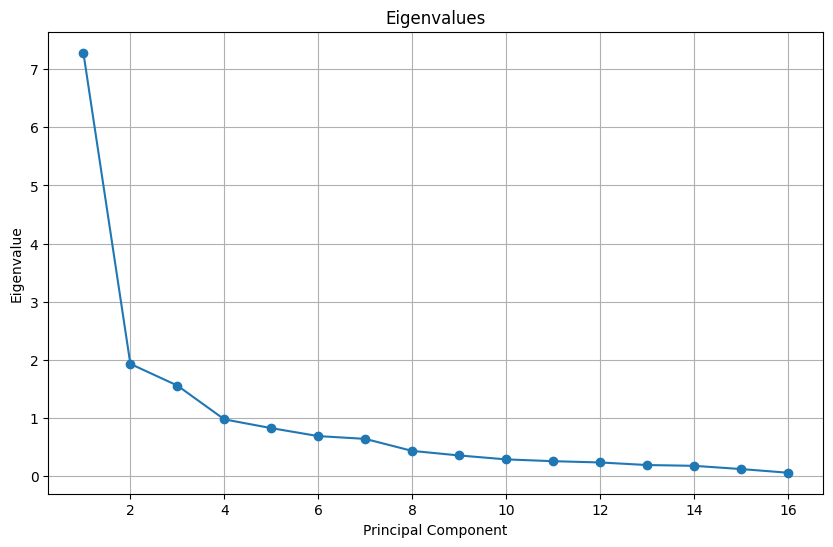

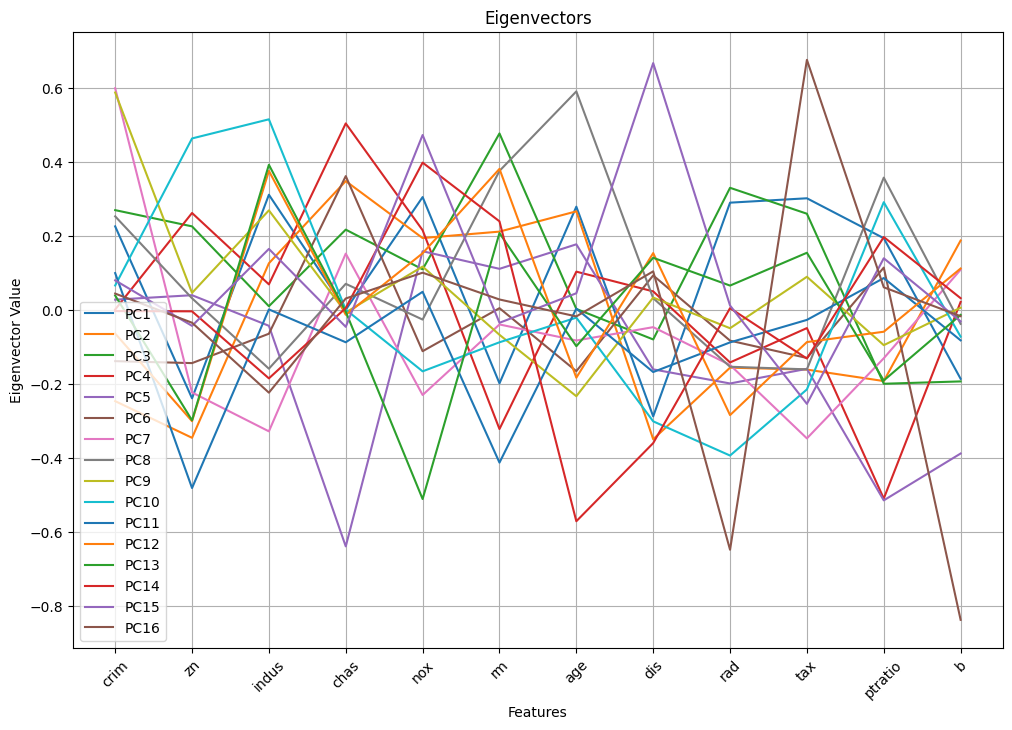

In [ ]:
# Plot eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# Plot eigenvectors
plt.figure(figsize=(12, 8))
for i in range(len(eigenvectors)):
    plt.plot(feature_names, eigenvectors[i][:len(feature_names)], label=f'PC{i+1}')
plt.title('Eigenvectors')
plt.xlabel('Features')
plt.ylabel('Eigenvector Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

The above plot shows the eigenvalues and eigenvectors for the principle components[features].

We choose the best feature based on explained variances as follows.

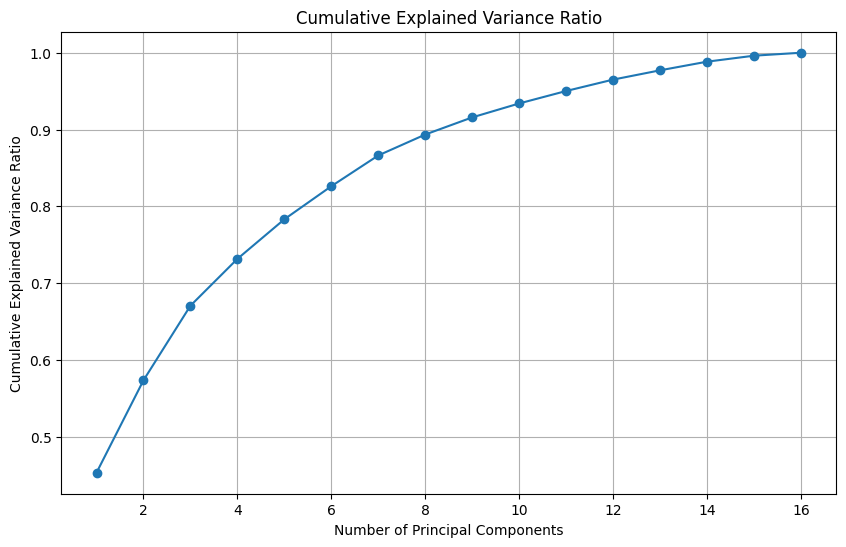

In [ ]:
# Choose number of components based on explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
# Choose number of components to retain based on explained variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'Number of components to retain: {n_components}')

# Select the first n_components for PCR
X_selected = X_pca[:, :n_components]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

Number of components to retain: 11


From the above explained varince ratio we retain 11 features for the linear regression model.

## ***Fitting Linear Regression Model***

After getting the factors of interest, we fit a linear regression model.

In [ ]:
# Fit linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict
y_pred = regressor.predict(X_test)

In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Find the final set of variables chosen for the model
final_variables = feature_names[:n_components]
print('Final set of variables chosen for the model:')
print(final_variables)

# Print the coefficients
print("Coefficients (Estimates):")
for i, coef in enumerate(regressor.coef_):
    print(f'PC{i+1}: {coef}')

Root Mean Squared Error (RMSE): 2.8806145174609257
Final set of variables chosen for the model:
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio'],
      dtype='object')
Coefficients (Estimates):
PC1: 2.1112322065628004
PC2: 0.857683910320856
PC3: 0.24152476809705903
PC4: 0.4167934641058839
PC5: -0.25563153597388033
PC6: -0.505670843831235
PC7: -2.165446984850407
PC8: -1.4533758151413174
PC9: 1.9669380905262706
PC10: 3.7069895839838822
PC11: -0.6378217727677885


## ***Conclusion***

The model built here is

$medv = intercept + 2.11*crim + 0.86*zn + 0.24*indus + 0.42*chas - 0.256*nox - 0.51*rm -2.16*age - 1.45*dis + 1.97*rad + 3.71 *tax -0.64*ptratio$

The root mean squared error is 2.88